단 두 장의 문서로 데이터 분석과 시각화 뽀개기
https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas/dashboard

# Syntax – Creating DataFrames

## 판다스 데이터프레임(DataFrame)과 시리즈(Series) 이해하기
## 판다스 데이터프레임 생성하고 데이터 가져오기

In [7]:
import pandas as pd

In [3]:
df = pd.DataFrame(
        {"a" : [4,5,6],
        "b" : [7,8,9],
        "c" : [10,11,12]},
        index = [1,2,3])

In [4]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [12]:
# 3번 인덱스의 a 컬럼의 변수는? 행, 열 순으로 쓰면 된다.

df.loc[3, "a"]

6

In [14]:
print("-"*50)

--------------------------------------------------


In [15]:
df.loc[[1,2], ["a", "b"]]

,a,b
1,4,7
2,5,8


In [17]:
df = pd.DataFrame(
        [[4, 7, 10],
        [5, 8, 11],
        [6, 9, 12]],
        index = [1, 2, 3],
        columns = ['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [18]:
df = pd.DataFrame(
    {"a" : [4 ,5, 6],
    "b" : [7, 8, 9],
    "c" : [10, 11, 12]},
    index = pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2)],
    names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

# Subset Observations (Rows)

## 판다스 데이터프레임 비교연산자로 색인하기, drop_duplicates()


In [21]:
df[df.a < 7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [22]:
df[df.b > 7]

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [24]:
df[df['c'] > 7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [25]:
df.drop_duplicates()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [26]:
df = pd.DataFrame(
    {"a" : [4 ,5, 6, 6],
    "b" : [7, 8, 9, 9],
    "c" : [10, 11, 12, 12]},
    index = pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2), ('e',3)],
    names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [33]:
# 중복값 제거하기

df.drop_duplicates()
df
# df.drop_duplicates(inplace = True)

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [37]:
df["b"] != 7
df[df["b"] != 7]

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [46]:
df['a'].isin([5, 6])
df.a.isin([5, 6])
# List 형태로만 담을 수 있다.

n  v
d  1    False
   2     True
e  2     True
Name: a, dtype: bool

## Logic in Python (and pandas) - and, or, not, xor, any, all 연산 이해하기

In [67]:
import numpy as np
df = pd.DataFrame(
    {"a" : [4 ,5, 6, 6, np.nan],
    "b" : [7, 8, np.nan, 9, 9],
    "c" : [10, 11, 12, np.nan, 12]},
    index = pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2), ('e',3), ('e', 4)],
    names=['n','v']))
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [68]:
pd.isnull(df)

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False   True  False
  3  False  False   True
  4   True  False  False

In [69]:
df['a'].isnull()
df['a'].isnull().sum()

1

In [70]:
pd.notnull(df)

a      b      c
n v                     
d 1   True   True   True
  2   True   True   True
e 2   True  False   True
  3   True   True  False
  4  False   True   True

In [71]:
df.notnull()
df.notnull().sum()

a    4
b    4
c    4
dtype: int64

In [72]:
df.a.notnull()

n  v
d  1     True
   2     True
e  2     True
   3     True
   4    False
Name: a, dtype: bool

* &,|,~,^,df.any(),df.all() 
* and, or, not, xor, any, all

In [73]:
~df.a.notnull()

n  v
d  1    False
   2    False
e  2    False
   3    False
   4     True
Name: a, dtype: bool

In [74]:
1 and 2

2

In [75]:
True and False

False

In [1]:
df[df.b == 7] & df[df.a == 5]

NameError: name 'df' is not defined

## head, tail로 데이터 미리보기 df.sample(frac=0.5), df.sample(n=10), df.nlarges

In [79]:
df = pd.DataFrame(
    {"a" : [4 ,5, 6, 6, np.nan],
    "b" : [7, 8, np.nan, 9, 9],
    "c" : [10, 11, 12, np.nan, 12]},
    index = pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2), ('e',3), ('e', 4)],
    names=['n','v']))
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [83]:
df.tail(2)
#df.head() 기본값이 5

a    b     c
n v                
e 3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [90]:
df.sample(frac=1)
# 랜덤하게 샘플 가져옴
# 비율은 바꿀 수 있음
# 특정 비율로 샘플링 하고 싶을 때

a    b     c
n v                
d 2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
d 1  4.0  7.0  10.0
e 3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [89]:
df.sample(n=2)
# 특정 갯수 만큼 샘플링 하고 싶을 때

a    b     c
n v                
e 4  NaN  9.0  12.0
  2  6.0  NaN  12.0

In [92]:
 df.iloc[1:2]
# 숫자부터 시작하는 인덱스에서 끝나는 인덱스 만큼 가져옴

,,a,b,c
n,v,,,
d,2,5.0,8.0,11.0


In [95]:
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],
                  'b': list('abdce'),
                  'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,NaN
3,11,c,3.0
4,-1,e,4.0


In [98]:
df.nlargest(2, 'a')
# 숫자만큼 큰 순서대로 가져온다.

,a,b,c
3,11,c,3.0
1,10,b,2.0


In [100]:
df.nsmallest(3,'a')

,a,b,c
4,-1,e,4.0
0,1,a,1.0
2,8,d,NaN


# Subset Variables (Columns)

## 일부 컬럼을 기준으로 데이터 가져오기 Subset Variables (Columns)

In [5]:
import pandas as pd
import seaborn as sns

In [10]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
columns = ['sepal_width','sepal_length','species']
df[columns].head()

,sepal_width,sepal_length,species
0,3.5,5.1,setosa
1,3.0,4.9,setosa
2,3.2,4.7,setosa
3,3.1,4.6,setosa
4,3.6,5.0,setosa


In [15]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [16]:
df.sepal_width
# 한글, 특수문자는 리스트로 감싸야 한다.

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [20]:
df.filter(regex='regex')
# regex 에 정규표현식 조건 넣으면 그거 가져옴
df.filter(regex='_')
# '_'가 들어가는 컬럼만 가져옴

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
df.filter(regex='length$')
#'length'로 끝나는 칼럼만 가져온다.

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [23]:
df.filter(regex='^sepal')
#'sepal'로 시작하는 칼럼만 가져온다.
# 대소문자를 맞춰야 한다.

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [25]:
df.filter(regex='^(?!species$).*')

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
df.loc[2:5, 'sepal_width' : 'petal_width']
# 행과 열로 지정해서, 어디부터 어디까지 가져와라 명령.
# 지정된 인덱스까지 포함

,sepal_width,petal_length,petal_width
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
5,3.9,1.7,0.4


In [31]:
df.iloc[:5, [1,2,4]]
# 지정된 index 전까지 따라서

,sepal_width,petal_length,species
0,3.5,1.4,setosa
1,3.0,1.4,setosa
2,3.2,1.3,setosa
3,3.1,1.5,setosa
4,3.6,1.4,setosa


In [35]:
df.loc[df['sepal_length'] > 3, ['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Summarize Data

## 기본 통계 하기 value_counts, nunique, sum, count, mean, median

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [19]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [20]:
df['species'].value_counts()
# 숫자, 카테고리 다 세어줌

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [21]:
pd.DataFrame(df['species'].value_counts())

,species
setosa,50
versicolor,50
virginica,50


In [22]:
len(df)
# 행이 몇 개인가?

150

In [23]:
df.shape

(150, 5)

In [24]:
len(df) == df.shape[0]

True

In [25]:
df['species'].nunique()
# 유니크의 갯수, 컬럼

3

In [26]:
# 요약된 수치 보기
df.describe()
df.describe(include=(np.object))

,species
count,150
unique,3
top,setosa
freq,50


In [27]:
df.describe(include=(np.number))

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


```
sum()
Sum values of each object.
count()
Count non-NA/null values of
each object.
median()
Median value of each object.
quantile([0.25,0.75])
Quantiles of each object.
apply(function)
Apply function to each object.
min()
Minimum value in each object.
max()
Maximum value in each object.
mean()
Mean value of each object.
var()
Variance of each object.
std()
Standard deviation of each
```

In [29]:
df['petal_width'].sum()

179.90000000000003

In [30]:
df['petal_width'].count()

150

In [31]:
df['petal_width'].median()

1.3

In [32]:
df['petal_width'].mean()

1.199333333333334

In [34]:
df.quantile([0.25,0.75])
df['petal_width'].quantile([0.25,0.75])

0.25    0.3
0.75    1.8
Name: petal_width, dtype: float64

In [35]:
df.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [36]:
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [37]:
df.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [38]:
df.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

## 판다스로 apply 활용하기 lambda 익명함수 사용하기

In [41]:
df.apply(lambda x: x[1])

sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
species         setosa
dtype: object

In [45]:
def smp(x):
    # 뒤에서 3번째 까지의 문자를 가져오는 함수
    x = x[-3:]
    return x

In [46]:
# 전처리 할 때 익명으로 쓸 수도 있다.
df['species'].apply(lambda x: x[:3])
df['sepcies_3'] = df['species'].apply(lambda x: x[:3])

In [47]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepcies_3
0,5.1,3.5,1.4,0.2,setosa,set
1,4.9,3.0,1.4,0.2,setosa,set
2,4.7,3.2,1.3,0.2,setosa,set
3,4.6,3.1,1.5,0.2,setosa,set
4,5.0,3.6,1.4,0.2,setosa,set
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,vir
146,6.3,2.5,5.0,1.9,virginica,vir
147,6.5,3.0,5.2,2.0,virginica,vir
148,6.2,3.4,5.4,2.3,virginica,vir


In [49]:
df['sepcies-3'] = df['species'].apply(smp)
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepcies_3,sepcies-3
0,5.1,3.5,1.4,0.2,setosa,set,osa
1,4.9,3.0,1.4,0.2,setosa,set,osa
2,4.7,3.2,1.3,0.2,setosa,set,osa
3,4.6,3.1,1.5,0.2,setosa,set,osa
4,5.0,3.6,1.4,0.2,setosa,set,osa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,vir,ica
146,6.3,2.5,5.0,1.9,virginica,vir,ica
147,6.5,3.0,5.2,2.0,virginica,vir,ica
148,6.2,3.4,5.4,2.3,virginica,vir,ica


# Handling Missing Data

## fillna, dropna 로 결측치 다루기

In [9]:
import pandas as pd
import numpy as np

In [11]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, 5]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [18]:
df.dropna(axis=1, how='any')
# all 전부 다 널이면 drop, any 하나라도 널이면 drop
# axis = 0 행, axis=1 컬럼

,D
0,0
1,1
2,5


In [19]:
df.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [22]:
df.fillna(0)
# 결측치를 다 0으로 채움

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5


In [24]:
values = {'A' : 0, 'B' :1, 'C' : 2, 'D' : 3}

In [26]:
df.fillna(value=values)
# 특정 값으로 채울 수 있다

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5


In [28]:
df['D'].mean()

2.0

In [30]:
df.fillna(df['D'].mean())
# 이렇게 채울 수도 있다

,A,B,C,D
0,2.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,2.0,2.0,2.0,5


In [33]:
# 혹은 이렇게 변수에 담아서, 특정 연산한 결과값으로 채울 수도 있다.
fill_na_value = df['D'].median()

In [34]:
df.fillna(fill_na_value)

,A,B,C,D
0,1.0,2.0,1.0,0
1,3.0,4.0,1.0,1
2,1.0,1.0,1.0,5


In [37]:
df.isnull()

,A,B,C,D
0,True,False,True,False
1,False,False,True,False
2,True,True,True,False


In [38]:
df.isnull().sum()

A    2
B    1
C    3
D    0
dtype: int64

In [39]:
df.notnull()

,A,B,C,D
0,False,True,False,True
1,True,True,False,True
2,False,False,False,True


In [40]:
df.notnull().sum()

A    1
B    2
C    0
D    3
dtype: int64

# Make New Columns

## assign 으로 새로운 컬럼 만들기, qcut 으로 binning, bucketing 하기

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame({'A':range(1,11), 'B':np.random.randn(10)})
df

,A,B
0,1,0.690355
1,2,-1.681434
2,3,-0.572761
3,4,-0.109547
4,5,0.834077
5,6,-1.884581
6,7,-1.044220
7,8,0.912508
8,9,0.508554
9,10,-0.672802


In [4]:
df.assign?

In [7]:
df.assign(ln_A = lambda x: np.log(x.A)).head()

,A,B,ln_A
0,1,0.690355,0.000000
1,2,-1.681434,0.693147
2,3,-0.572761,1.098612
3,4,-0.109547,1.386294
4,5,0.834077,1.609438


In [10]:
df["ln_A"] = np.log(df.A)
df

,A,B,ln_A
0,1,0.690355,0.000000
1,2,-1.681434,0.693147
2,3,-0.572761,1.098612
3,4,-0.109547,1.386294
4,5,0.834077,1.609438
5,6,-1.884581,1.791759
6,7,-1.044220,1.945910
7,8,0.912508,2.079442
8,9,0.508554,2.197225
9,10,-0.672802,2.302585


In [15]:
pd.qcut(df.B, 3, labels=["good", "medium", "bad"])
pd.qcut(df.B, 2, labels=["good", "bad"])

0     bad
1    good
2    good
3     bad
4     bad
5    good
6    good
7     bad
8     bad
9    good
Name: B, dtype: category
Categories (2, object): [good < bad]

In [16]:
df.max(axis=1)
# 컬럼의 최대값을 가져옴

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [17]:
df.max(axis=0)
#row 의 최댓값을 가져옴

A       10.000000
B        0.912508
ln_A     2.302585
dtype: float64

In [18]:
df.min(axis=0)

A       1.000000
B      -1.884581
ln_A    0.000000
dtype: float64

In [22]:
df["A"].clip(lower=-1,upper=5)
# -1 부터 5까지의 값으로 바꿔준다

0    1
1    2
2    3
3    4
4    5
5    5
6    5
7    5
8    5
9    5
Name: A, dtype: int64

In [24]:
df["B"].abs()
# 절댓값으로 바꿔준다.

0    0.690355
1    1.681434
2    0.572761
3    0.109547
4    0.834077
5    1.884581
6    1.044220
7    0.912508
8    0.508554
9    0.672802
Name: B, dtype: float64

# Reshaping Data

## df.sort_values, rename, sort_index, reset_index 로 데이터 프레임 Reshaping 하기

In [3]:
import pandas as pd
import seaborn as sns

In [6]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
df.sort_values('cylinders').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
267,27.5,4,134.0,95.0,2560,14.2,78,japan,toyota corona


In [11]:
df.sort_values('mpg').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


In [14]:
df.sort_values('mpg', ascending=False).head()
# 정렬을 역순으로 하겠다는 의미
# 기본값이 True 로, 순차정렬이 된다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


In [15]:
df.sort_values?

In [18]:
df.rename(columns = {'model_year':'year'}).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
df.head()
#저장 안하면 그대로 나온다

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [22]:
df = df.rename(columns = {'model_year':'year'}).head()
# 그러니까 다시 넣어주기
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
df.sort_index()
# 맨 왼쪽 인덱스 별로 정렬하겠다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
df.reset_index()
# 인덱스라는 새 컬럼이 생겨서 정렬
# 인덱스가 없을 때 보통 사용한다

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
df = df.drop(columns=['mpg','year'])
# 특정 컬럼 드랍
# 마찬가지로 저장 해줘야 한다.

## melt, pivot 으로 Tidy Data 만들기

In [2]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [8]:
pd.melt(df, id_vars=['A'], value_vars=['B','C'])
# 컬럼을 로우로 옮길 수 있다.

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [12]:
pd.melt(df, value_vars=['A','B','C']).rename(columns={
'variable' : 'var',
'value' : 'val'})
# 이름 변경 가능

,var,val
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [20]:
df2 = pd.DataFrame({'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'foo': ['one', 'one', 'one', 'two', 'two', 'two']})
df2

,bar,baz,foo
0,A,1,one
1,B,2,one
2,C,3,one
3,A,4,two
4,B,5,two
5,C,6,two


In [25]:
df3 = df2.pivot(index='foo', columns='bar', values='baz').reset_index()
df3

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [28]:
df3.melt(id_vars=['foo'], value_vars=['A','B','C'])

,foo,bar,value
0,one,A,1
1,two,A,4
2,one,B,2
3,two,B,5
4,one,C,3
5,two,C,6


In [32]:
df3.melt(id_vars=['foo'], value_vars=['A','B','C']).sort_values(
    ['foo','bar']).rename(columns = {'value':'barz'})

,foo,bar,barz
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


## pd.concat([df1, df2]) 시리즈, 데이터프레임 합치기

In [1]:
import pandas as pd

In [2]:
pd.concat?

In [3]:
s1 = pd.Series(['a','b'])
s1

0    a
1    b
dtype: object

In [4]:
s2 = pd.Series(['c','d'])
s2

0    c
1    d
dtype: object

In [5]:
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [6]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [8]:
pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [9]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [10]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [11]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [12]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [14]:
pd.concat([df1, df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [15]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [16]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [17]:
df5 = pd.DataFrame([1], index=['a'])
df5

,0
a,1


In [18]:
df6 = pd.DataFrame([2], index=['a'])
df6

,0
a,2


In [21]:
pd.concat([df5, df6])

,0
a,1
a,2


# Combine Data Sets

## merge 로 데이터프레임 합치기 left, right, inner, outer 옵션 사용하기

실습코드 : https://github.com/corazzon/cracking-the-pandas-cheat-sheet 

In [1]:
import pandas as pd

In [2]:
adf = pd.DataFrame({"x1":["A","B","C"], "x2":[1,2,3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [3]:
bdf = pd.DataFrame({"x1":["A","B","D"], "x2":["T","F","T"]})
bdf

,x1,x2
0,A,T
1,B,F
2,D,T


In [4]:
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2_x,x2_y
0,A,1,T
1,B,2,F
2,C,3,NaN


In [5]:
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2_x,x2_y
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [6]:
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2_x,x2_y
0,A,1,T
1,B,2,F


In [7]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2_x,x2_y
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [9]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

In [10]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [11]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [12]:
ydf = pd.DataFrame({"x1":["A","B","C"], "x2":[1,2,3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [14]:
zdf = pd.DataFrame({"x1":["B","C","D"], "x2":[2,3,4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [15]:
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [17]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [18]:
pd.merge(ydf, zdf, how='outer', indicator=True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [19]:
pd.merge(ydf, zdf, how='outer', indicator=True
        ).query('_merge == "left_only"')

,x1,x2,_merge
0,A,1,left_only


In [20]:
pd.merge(ydf, zdf, how='outer', indicator=True
        ).query('_merge == "left_only"'
               ).drop(columns=['_merge'])

,x1,x2
0,A,1


# Group Data

## groupby 활용하여 다양한 데이터 집계를 활용하기

In [2]:
import pandas as pd
import seaborn as sns

In [26]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
# 각 그룹의 사이즈를 알 수 있다.
df.groupby(by='origin').size()

origin
europe     70
japan      79
usa       249
dtype: int64

In [8]:
# 굳이 그룹바이 안해도 이렇게 알 수는 있다.
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [11]:
# 그룹바이를 하면 이런 다양한 값을 알 수 있다.
df.groupby(by='origin').min()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,16.2,4,68.0,46.0,1825,12.2,70,audi 100 ls
japan,18.0,3,70.0,52.0,1613,11.4,70,datsun 1200
usa,9.0,4,85.0,52.0,1800,8.0,70,amc ambassador brougham


In [13]:
# 특정 컬럼의 값만 알 수도 있다.
df.groupby(by='origin')["cylinders"].mean()

origin
europe    4.157143
japan     4.101266
usa       6.248996
Name: cylinders, dtype: float64

In [14]:
# 나중에 df.pivot_table 써볼 것!

In [17]:
df.groupby(["model_year", "origin"]).mean().head()

mpg  cylinders  displacement  horsepower  weight  \
model_year origin                                                           
70         europe  25.200000   4.000000    107.800000   86.200000  2309.2   
           japan   25.500000   4.000000    105.000000   91.500000  2251.0   
           usa     15.272727   7.636364    336.909091  166.954545  3716.5   
71         europe  28.750000   4.000000     95.000000   74.000000  2024.0   
           japan   29.500000   4.000000     88.250000   79.250000  1936.0   

                   acceleration  
model_year origin                
70         europe     16.500000  
           japan      14.750000  
           usa        11.977273  
71         europe     16.750000  
           japan      16.375000

In [19]:
pd.DataFrame(df.groupby(["model_year", "origin"])['cylinders'].mean().head())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000

In [37]:
df2 = pd.DataFrame(
[[4, 7, 10],
[5, 11, 8],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

In [22]:
df2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [24]:
# 행을 옮길 수 있다.
df2.shift(-1)

,a,b,c
1,5.0,8.0,11.0
2,6.0,9.0,12.0
3,NaN,NaN,NaN


In [25]:
# 특정 컬럼의 행만도 옮길 수 있다.
# 결측치 처리에 유용하다.
df2['a'].shift(-1)

1    5.0
2    6.0
3    NaN
Name: a, dtype: float64

In [28]:
df["model_year"].rank(method='dense')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
393    13.0
394    13.0
395    13.0
396    13.0
397    13.0
Name: model_year, Length: 398, dtype: float64

In [29]:
# 작은 순으로 몇 번째냐
df["model_year"].rank(method='min')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
       ...  
393    368.0
394    368.0
395    368.0
396    368.0
397    368.0
Name: model_year, Length: 398, dtype: float64

In [30]:
# 순위끼리 몇개냐
df["model_year"].rank(method='min').value_counts()

86.0     40
245.0    36
183.0    34
368.0    31
153.0    30
339.0    29
281.0    29
310.0    29
1.0      29
217.0    28
58.0     28
30.0     28
126.0    27
Name: model_year, dtype: int64

In [32]:
# 비율
df["model_year"].rank(pct=True)

0      0.037688
1      0.037688
2      0.037688
3      0.037688
4      0.037688
         ...   
393    0.962312
394    0.962312
395    0.962312
396    0.962312
397    0.962312
Name: model_year, Length: 398, dtype: float64

In [33]:
df["model_year"].rank(method='first')

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
393    394.0
394    395.0
395    396.0
396    397.0
397    398.0
Name: model_year, Length: 398, dtype: float64

In [35]:
# 누적합
df2.cumsum()

,a,b,c
1,4,7,10
2,9,15,21
3,15,24,33


In [38]:
df2.cummax()

,a,b,c
1,4,7,10
2,5,11,10
3,6,11,12


In [39]:
df2.cummin()

,a,b,c
1,4,7,10
2,4,7,8
3,4,7,8


In [40]:
df2.cumprod()

,a,b,c
1,4,7,10
2,20,77,80
3,120,693,960


# 시계열 데이터 분석 Windows

## 시계열 데이터(Time Series Data) 분석을 위한 판다스 Expanding and Rolling 이해하기

### Pandas Expanding and Rolling
시계열 데이터 분석 할 때 주로 쓰인다.

https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

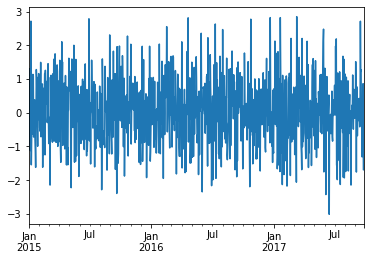

In [10]:
s = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2015', periods=1000))
s.plot()

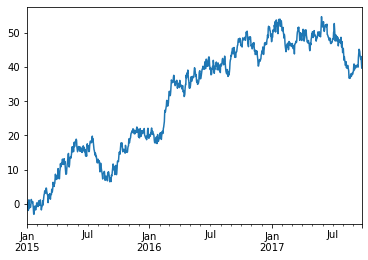

In [11]:
s = s.cumsum()
s.plot()

In [13]:
r = s.rolling(window=31)
r

Rolling [window=60,center=False,axis=0]

In [16]:
# r.<TAB>

In [21]:
r = s.rolling(window=31)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    40.198071
2017-09-23    40.371129
2017-09-24    40.535857
2017-09-25    40.650830
2017-09-26    40.726958
Freq: D, Length: 1000, dtype: float64

이동평균

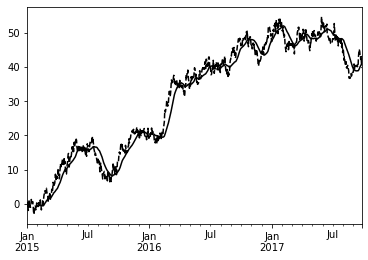

In [23]:
# 이동평균
s.plot(style='k--')
r.mean().plot(style='k')

DataFrame 으로 해보기

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

In [25]:
 df

,A,B,C,D
2015-01-01,-0.666009,0.217577,0.822243,-1.216391
2015-01-02,-0.493074,-0.547889,0.480326,-0.374834
2015-01-03,-1.623989,0.281324,-0.183056,-0.861792
2015-01-04,-0.160689,1.022158,0.831167,-0.633065
2015-01-05,0.714775,-2.066500,-0.012177,-0.327559
...,...,...,...,...
2017-09-22,1.117792,-0.994683,-0.333995,-0.029658
2017-09-23,0.167880,-0.725690,0.429575,0.519934
2017-09-24,0.304025,-1.512623,-0.962887,-0.375972
2017-09-25,0.541178,1.073767,-0.626095,0.192228


In [27]:
df = df.cumsum()
df

,A,B,C,D
2015-01-01,-0.666009,0.217577,0.822243,-1.216391
2015-01-02,-1.825093,-0.112735,2.124812,-2.807616
2015-01-03,-4.608165,-0.161723,3.244324,-5.260634
2015-01-04,-7.551925,0.811448,5.195004,-8.346717
2015-01-05,-9.780911,-0.281881,7.133507,-11.760359
...,...,...,...,...
2017-09-22,16137.713101,55201.213875,-12340.895480,-15083.522369
2017-09-23,16175.129005,55284.597736,-12348.824910,-15103.006377
2017-09-24,16212.848934,55366.468974,-12357.717226,-15122.866357
2017-09-25,16251.110042,55449.413980,-12367.235638,-15142.534108


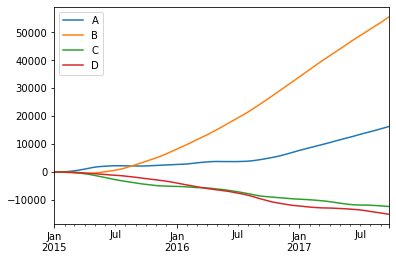

In [28]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E71BF99160>,
      dtype=object)

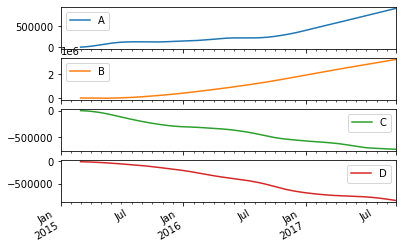

In [29]:
df.rolling(window=60).sum().plot(subplots=True)

### window expanding
누적

In [30]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2015-01-01,-0.666009,0.217577,0.822243,-1.216391
2015-01-02,-1.245551,0.052421,1.473527,-2.012004
2015-01-03,-2.366422,-0.018960,2.063793,-3.094881
2015-01-04,-3.662798,0.188642,2.846596,-4.407840
2015-01-05,-4.886421,0.094537,3.703978,-5.878344


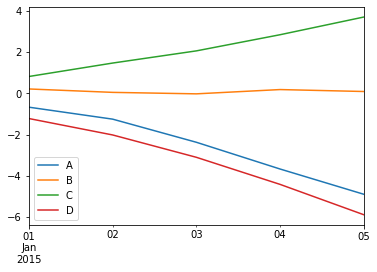

In [31]:
df.rolling(window=len(df), min_periods=1).mean()[:5].plot()

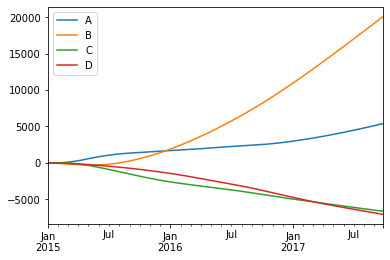

In [33]:
df.expanding(min_periods=1).mean().plot()

In [34]:
df.expanding?

In [44]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


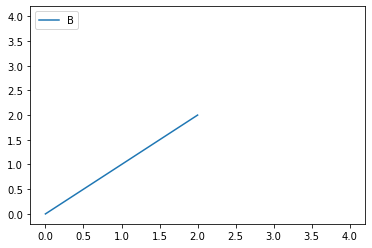

In [45]:
# NaN 이 있어서 중간에 끊기게 그려진다.
dfe.plot()

In [48]:
# 누적합계로 가져온다.
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


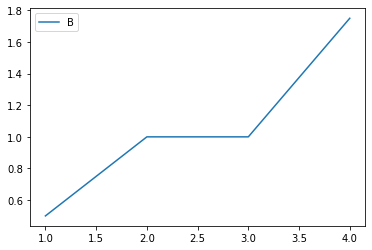

In [50]:
dfe.expanding(2).mean().plot()

# 데이터 시각화 Plotting 기능 활용하기

## 파이썬 판다스로 Series 와 DataFrame 데이터 시각화 하기 소개  
* 공식문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization  


* 실습코드 : https://github.com/corazzon/cracking-the-pandas-cheat-sheet  


* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf  


* 판다스 10분 완성 :  https://dataitgirls2.github.io/10minutes2pandas/

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.DataFrame()

Plot    
kind : str
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

In [13]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

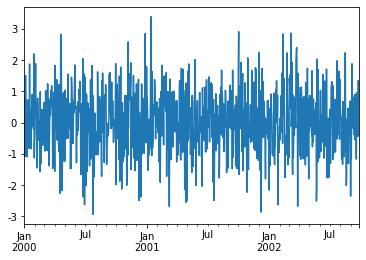

In [15]:
ts.plot()

In [16]:
ts = ts.cumsum()

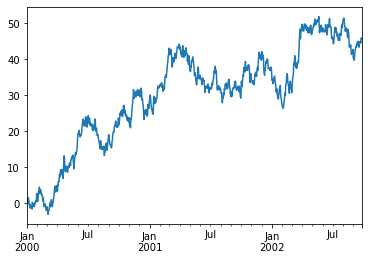

In [17]:
ts.plot()

In [18]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

In [19]:
df

,A,B,C,D
2000-01-01,-0.779309,-0.959490,-0.083609,0.613732
2000-01-02,-0.621875,-0.028948,0.041042,0.393258
2000-01-03,-0.619557,0.226279,0.460643,0.575377
2000-01-04,1.002027,0.108770,-1.058354,-1.236694
2000-01-05,-1.214062,0.768143,-0.291609,0.692432
...,...,...,...,...
2002-09-22,-0.701403,1.148203,-0.496899,-1.994021
2002-09-23,1.324071,0.418046,1.225770,-0.360064
2002-09-24,0.795026,-1.002324,-2.125547,-2.387755
2002-09-25,0.197379,0.476200,-1.540408,-1.153916


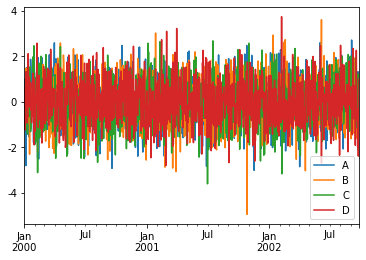

In [20]:
df.plot()

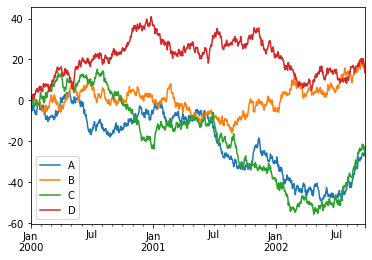

In [21]:
df = df.cumsum()
df.plot()

In [22]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

In [23]:
df3.head()

,B,C
0,-0.965813,0.545343
1,0.088959,0.688651
2,0.614848,0.553122
3,1.185845,0.693015
4,2.293855,1.370344


In [24]:
df3['A'] = pd.Series(list(range(len(df))))

In [25]:
df3.head()

,B,C,A
0,-0.965813,0.545343,0
1,0.088959,0.688651,1
2,0.614848,0.553122,2
3,1.185845,0.693015,3
4,2.293855,1.370344,4


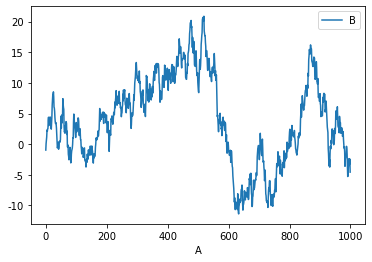

In [26]:
df3.plot(x='A', y='B')

## 파이썬 데이터 시각화 판다스로 bar plot 막대그래프 그리기

* 공식문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots

* 실습코드 : https://github.com/corazzon/cracking-the-pandas-cheat-sheet 

* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* 판다스 10분 완성 :  https://dataitgirls2.github.io/10minutes2pandas/

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [12]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01   -1.382094
2000-01-02    0.545405
2000-01-03    0.245886
2000-01-04    2.126470
2000-01-05   -0.479606
Freq: D, dtype: float64

In [13]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
df.head(6)

,A,B,C,D
2000-01-01,0.711622,0.567860,-0.433258,0.383517
2000-01-02,0.180535,-0.014426,0.035807,-2.417231
2000-01-03,-1.010027,0.868111,-0.510259,-1.645249
2000-01-04,-2.060206,-0.274393,1.324454,0.633914
2000-01-05,0.213370,-1.128825,0.323453,-1.218076
2000-01-06,0.182775,-0.479932,-0.071100,-0.154394


In [14]:
df.tail(2)

,A,B,C,D
2002-09-25,2.011125,1.112001,-0.532024,0.624653
2002-09-26,1.388501,-0.835194,-0.427480,0.227988


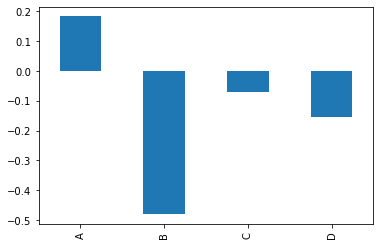

In [15]:
df.iloc[5].plot(kind='bar')

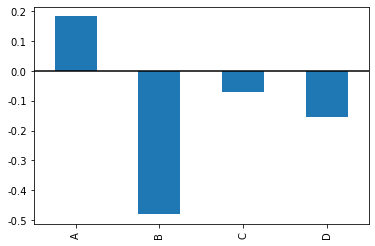

In [22]:
df.iloc[5].plot.bar()
plt.axhline(0, color = 'k')
# 버티컬도 할 수 있음

In [25]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head()

,a,b,c,d
0,0.338561,0.235360,0.711885,0.009831
1,0.154775,0.133012,0.641328,0.594730
2,0.108005,0.725669,0.827284,0.027535
3,0.114168,0.975074,0.494881,0.402519
4,0.235094,0.925058,0.547069,0.879439


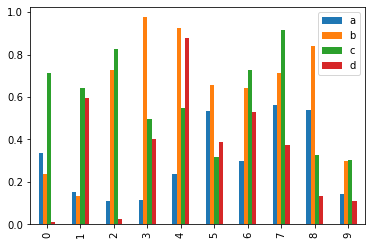

In [26]:
df2.plot.bar()

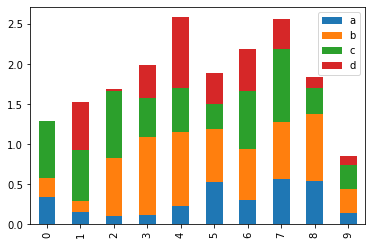

In [28]:
# 누적
df2.plot.bar(stacked=True)

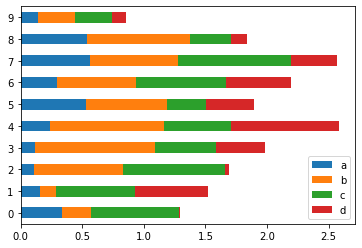

In [29]:
df2.plot.barh(stacked=True)

## 파이썬 데이터 시각화 히스토그램과 도수분포표 이해하기, 막대그래프 vs 히스토그램 차이점 이해하기


* 공식문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms

* 실습코드 : https://github.com/corazzon/cracking-the-pandas-cheat-sheet 

* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* 판다스 10분 완성 :  https://dataitgirls2.github.io/10minutes2pandas/

Histograms  
**도수분포표vs 히스토그램**  
* 도수분포표 : 특정 구간에 속하는 자료의 개수를 표현(도수 분포 - 위키백과, 우리 모두의 백과사전)
* 히스토그램 : 도수분포표를 시각화하여 막대그래프로 표현, 하지만 bar plot 과는 다름 (히스토그램 - 위키백과)  
**막대그래프 vs 히스토그램 (bar plot vs his plot)**  
* bar plot : 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프, 합계, 평균 등의 수치를 시가화 (막대 그래프 - 위키백과)
* hist plot : 구간 별 빈도수를 표현  
**히스토그램 vs 정규분포 (hist plot vs density plot)**  
* hist plot : 구간별 빈도수

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

In [4]:
df4.head()

,a,b,c
0,0.909190,-0.012584,-1.469454
1,-0.266074,-0.968581,-2.135455
2,1.630186,-0.406306,-1.072841
3,-0.347632,0.771954,-1.990394
4,-0.184264,1.348148,-0.695870


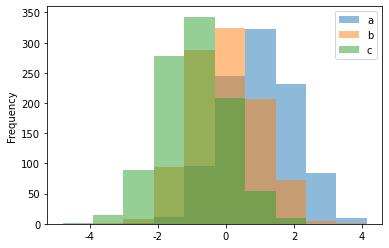

In [5]:
# bin 값에 따라서 기본적으로 10개 빈으로 만들어진다.
df4.plot.hist(alpha=0.5)

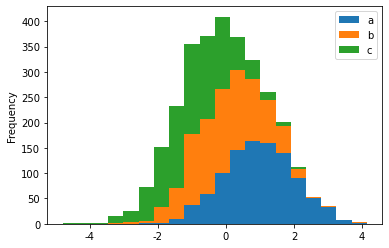

In [6]:
# 누적, 빈 값 20개(통에 담는다는 의미)
df4.plot.hist(stacked=True, bins=20)

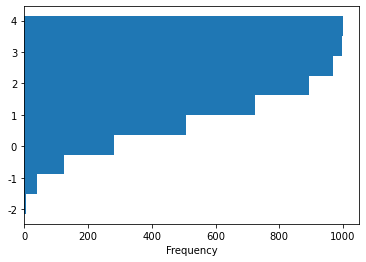

In [7]:
# 축 바꾸고 누적값으로 바꿈
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

## 파이썬 판다스로 차분 diff 값을 구하고 히스토그램으로 표현하기

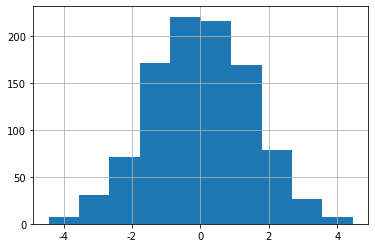

In [9]:
df4['a'].diff().hist()

In [16]:
# 앞의 값에서 뒤의 값을 뺀 것 의미
df4['a_diff'] = df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a'] - df4['a_shift']
df4[['a', 'a_diff', 'a_shift', 'a_minus']].head()

,a,a_diff,a_shift,a_minus
0,0.909190,NaN,NaN,NaN
1,-0.266074,-1.175264,0.909190,-1.175264
2,1.630186,1.896260,-0.266074,1.896260
3,-0.347632,-1.977818,1.630186,-1.977818
4,-0.184264,0.163368,-0.347632,0.163368


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E35400D3D0>,
      dtype=object)

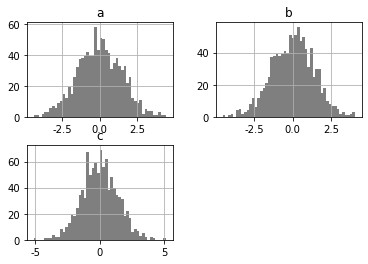

In [18]:
df4[['a','b','c']].diff().hist(color='k', alpha=0.5, bins=50)

In [22]:
data = pd.Series(np.random.randn(1000))

data = pd.DataFrame({'a': np.random.randn(1000),
                    'b': np.random.randint(0, 4, 1000)})
data.head()

,a,b
0,0.454290,3
1,0.134397,1
2,0.194988,3
3,0.329890,2
4,-0.408715,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3542893A0>,
      dtype=object)

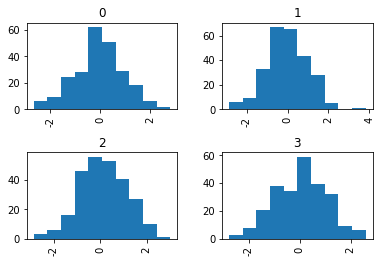

In [20]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3543F0EB0>,
      dtype=object)

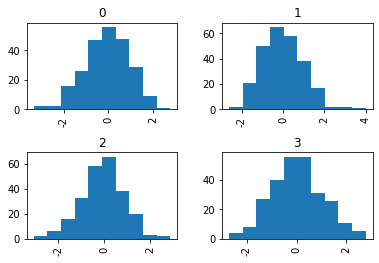

In [23]:
data['a'].hist(by=data['b'], figsize=(6, 4))

## 파이썬 시각화 상자 수염 그림(box plot) 그리기

box plot  
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots  
* box-and-whisker plot, box-and whisker diagram
* 상자-수염 그림 -위키백과
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.  


1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

In [6]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.437184,0.444553,0.595261,0.588549,0.527132
std,0.169499,0.311755,0.336440,0.296549,0.253648
min,0.209103,0.093222,0.078143,0.072903,0.127318
25%,0.306319,0.174740,0.326257,0.531036,0.374860
50%,0.440369,0.354543,0.719600,0.608931,0.502197
75%,0.519014,0.683622,0.851940,0.789821,0.714408
max,0.714982,0.956122,0.972152,0.923155,0.894637


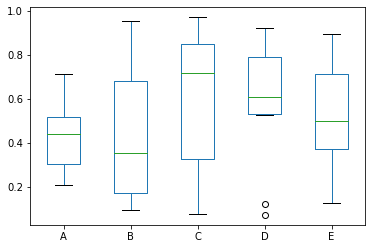

In [7]:
df.plot.box()

In [8]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}

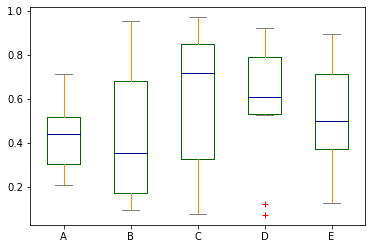

In [10]:
# 이상치는 + 로 표시해라
df.plot.box(color=color, sym='r+')

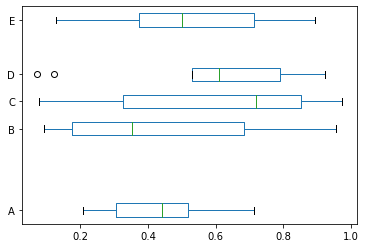

In [11]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [12]:
df = pd.DataFrame(np.random.rand(10, 5))

In [14]:
df.head()

,0,1,2,3,4
0,0.128200,0.422756,0.314168,0.694143,0.571902
1,0.371273,0.694083,0.161538,0.921160,0.534768
2,0.205711,0.031779,0.700113,0.680357,0.838932
3,0.772022,0.679385,0.136862,0.629405,0.116577
4,0.073960,0.314859,0.701916,0.170820,0.979566


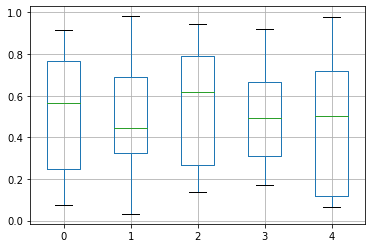

In [15]:
bp = df.boxplot()

In [16]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])
df.head()

,Col1,Col2
0,0.973513,0.463065
1,0.931439,0.585913
2,0.520499,0.039838
3,0.817804,0.332007
4,0.473561,0.353542


In [17]:
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
df.head()

,Col1,Col2,X
0,0.973513,0.463065,A
1,0.931439,0.585913,A
2,0.520499,0.039838,A
3,0.817804,0.332007,A
4,0.473561,0.353542,A


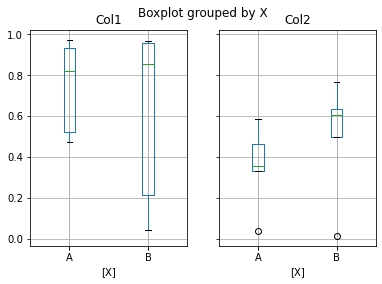

In [18]:
bp = df.boxplot(by='X')

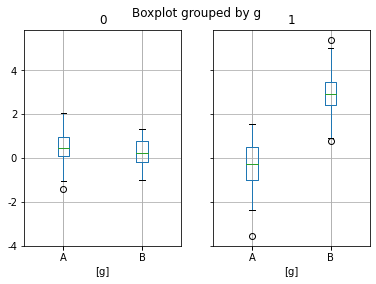

In [20]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

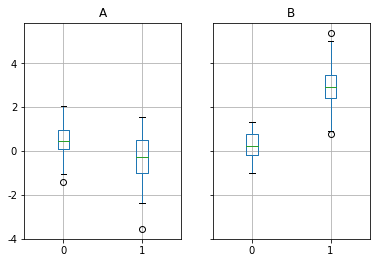

In [21]:
bp = df_box.groupby('g').boxplot()

## 파이썬 데이터 시각화 Area plot, Grid 옵션으로 그래프 격자 만들기

area plot  
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#area-plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.498755,0.289046,0.744618,0.323704
1,0.345406,0.357867,0.262106,0.945424
2,0.637853,0.477028,0.134971,0.140147
3,0.187243,0.566036,0.176060,0.761008
4,0.940146,0.391611,0.082074,0.581204


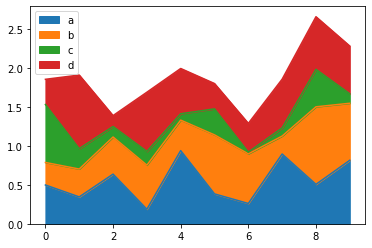

In [5]:
df.plot.area()
# When input data contains NaN, it will be automatically filled by 0
# 기본적으로 stacked= True

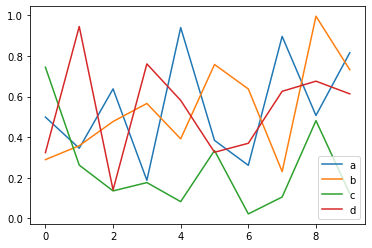

In [6]:
df.plot()

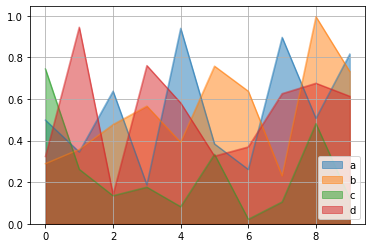

In [7]:
df.plot.area(stacked= False, grid=True)

## 파이썬 데이터 시각화 scatter plot, 산점도 그리기

scatter plot  
* 산점도  
23) 파이썬 데이터 시각화 scatter plot, 산점도 그리기  
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.142147,0.994977,0.475328,0.471641
1,0.335791,0.055079,0.311354,0.720185
2,0.730803,0.683433,0.669813,0.581066
3,0.063969,0.945707,0.759141,0.580667
4,0.896630,0.092490,0.556003,0.352268


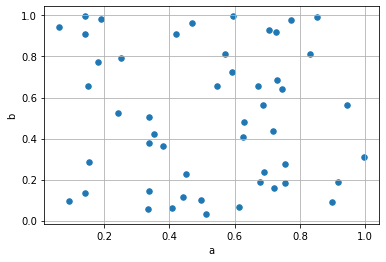

In [6]:
# s 사이즈
df.plot.scatter(x='a', y='b', s=30, grid=True)

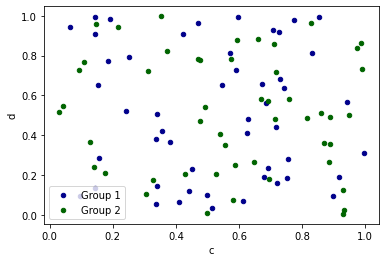

In [8]:
# 색상 설정해서 두 개를 이렇게 같이 그릴 수도 있다.
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

The keyword c may be given as the name of a column to provide colors for each point:

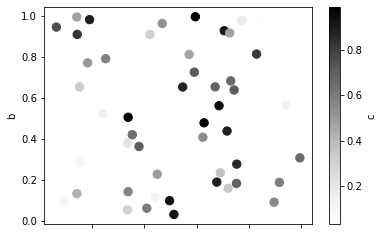

In [10]:
df.plot.scatter(x='a', y='b', c='c', s=70)

You can pass other keywords supported by matplotlib scatter. The example below shows a bubble chart using a column of the DataFrame as the bubble size.

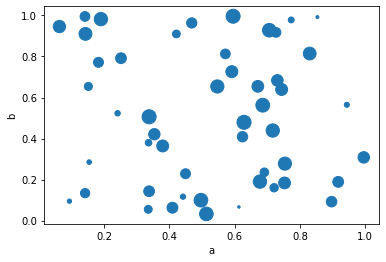

In [12]:
# 한 컬럼의 크기만 키우기
df.plot.scatter(x='a', y='b', s=df['c'] * 200)

## 파이썬 데이터 시각화 히스토그램과 산점도를 보완한 Hexbin plot 그리기

Hexagonal Bin Plot  
* Hexbin plot 은 데이터가 클 때 각각의 점을 산점도(scatter plot)로 표현할 때의 단점을 보완할 수 있습니다.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#hexagonal-bin-plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

You can create hexagonal bin plots with DataFrame.plot.hexbin(). Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [7]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.head()

,a,b
0,0.997931,-0.022909
1,-0.213712,1.453080
2,-0.022197,1.418720
3,-0.450622,4.816201
4,1.492491,4.968313


A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

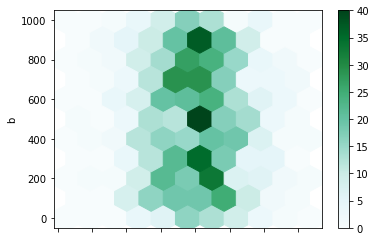

In [10]:
# scatter plot 대안이 되기도 하고 hist 와도 비슷하다.
df.plot.hexbin(x='a', y='b', gridsize=10)

In [11]:
# 0 과 3 사이의 수로 1000개 생성한 컬럼 추가
df['z'] = np.random.uniform(0, 3, 1000)

In [12]:
df['z']

0      1.631497
1      0.062429
2      1.066778
3      2.367081
4      1.906821
         ...   
995    0.248646
996    1.534144
997    2.604550
998    2.316461
999    1.970222
Name: z, Length: 1000, dtype: float64

기본적으로 각(x, y) 점 주변의 개수에 대한 히스토그램이 계산됩니다. C 및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있습니다. C는 각각 (x, y) 점에서 값을 지정하고 reduce_C_function 은 빈의 모든 값을 단일 숫자 (예: 평균, 최대값, 합계, 표준)로 줄이는 하나의 인수의 함수입니다. 이 예에서 위치는 열(column) a 및 b 에 의해 주어지며 값은 열 (z)에 의해 주어집니다. 빈은 NumPy의 max 함수로 집계 된다.

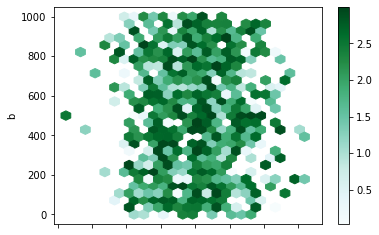

In [13]:
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

## Pandas pie plot, 원 그래프, 왜 seaborn 에는 파이차트가 없을까?

Pie plot  
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

In [3]:
series = pd.Series(3 * np.random.rand(4),
                   index=['a', 'b', 'c', 'd'], name='series')
series

a    2.400219
b    1.203972
c    2.093946
d    0.863254
Name: series, dtype: float64

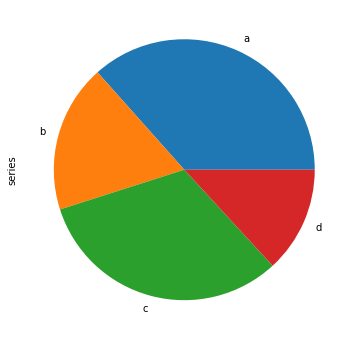

In [4]:
series.plot.pie(figsize=(6, 6))

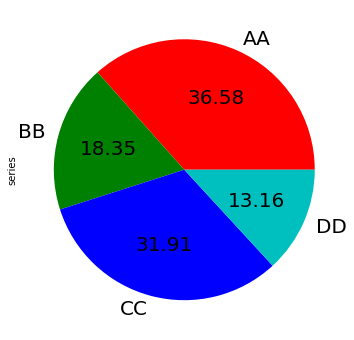

In [7]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'],
                colors=['r', 'g', 'b', 'c']
               , autopct='%.2f', fontsize=20, figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1795CD910>,
      dtype=object)

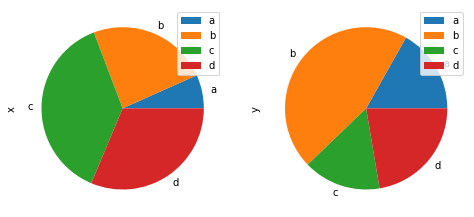

In [5]:
df = pd.DataFrame(3 * np.random.rand(4, 2),
                  index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

Plotting with missing data

## Scatter Matrix Plot 산점도와 커널밀도함수를 함께 표현해 보도록 합니다.

Scatter Matrix Plot  
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-matrix-plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from pandas.plotting import scatter_matrix

In [4]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.657918,0.727644,1.550486,0.938281
1,0.525664,-1.194363,0.356435,1.918814
2,0.076954,-1.285919,0.796848,1.147856
3,0.368600,2.000754,0.922287,-1.847408
4,1.449980,1.061480,-1.713035,-0.283744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8ED9DC940>,
      dtype=object)

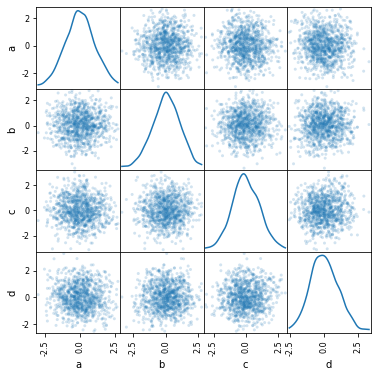

In [5]:
# kde - 커널밀도함수
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## 파이썬 시각화 분포도 그리기, Kernel Density Estimate plot 커널밀도함수, 밀도함수

**Kernel Density Estimate**  
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#density-plot  
* 통계에서 커널 밀도 추정 (KDE)은 임의 변수의 확률 밀도 함수 (PDF) 를 추정하는 비모수적 방법이다. 이 함수는 가우스 커널을 사용하여 자동 대역폭 결정을 포함한다.
* 비모수 통계
* 커널 밀도 추정치는 히스토그램과 밀접한 관련이 있지만 적절한 커널을 사용하여 매끄럽고 연속성과 같은 속성을 부여 할 수 있다.
* 커널 함수는 원점을 중심으로 대칭이며 적분값이 1인 함수다.

**확률 밀도 함수 (probability density function)**  
* 확률 밀도 함수
* 확률 변수

**정규분포**  
* 확률론과 통계학에서, 정규 분포(normal distribution) 또는 가우시안 분포(Gaussian distribution)는 연속 확률 분포의 하나이다. 정규분포는 수집된 자료의 분포를 근사하는 데에 자주 사용되며, 이것은 중심극한정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다. - 출처 : 정규분포 - 위키백과

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

You can create density plots using the Series.plot.kde() and DataFrame.plot.kde() methods.

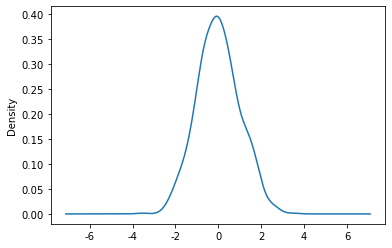

In [2]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
# density 와 kde는 같은 그래프를 그린다.

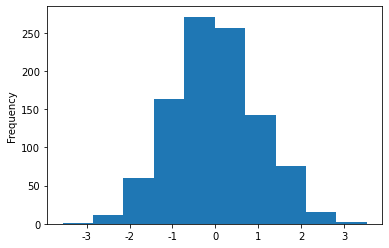

In [3]:
ser.plot.hist()

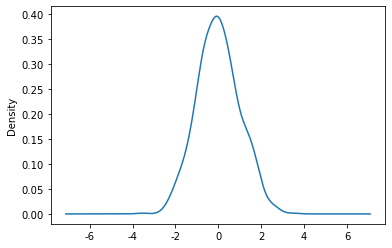

In [4]:
ser.plot.density()

In [ ]:
# Kernel Density Estimate
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#density-plot  
* 통계에서 커널 밀도 추정 (KDE)은 임의 변수의 확률 밀도 함수 (PDF) 를 추정하는 비모수적 방법이다. 이 함수는 가우스 커널을 사용하여 자동 대역폭 결정을 포함한다.
* 비모수 통계
* 커널 밀도 추정치는 히스토그램과 밀접한 관련이 있지만 적절한 커널을 사용하여 매끄럽고 연속성과 같은 속성을 부여 할 수 있다.
* 커널 함수는 원점을 중심으로 대칭이며 적분값이 1인 함수다.

## 확률 밀도 함수 (probability density function)
* 확률 밀도 함수
* 확률 변수

## 정규분포
* 확률론과 통계학에서, 정규 분포(normal distribution) 또는 가우시안 분포(Gaussian distribution)는 연속 확률 분포의 하나이다. 정규분포는 수집된 자료의 분포를 근사하는 데에 자주 사용되며, 이것은 중심극한정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다. - 출처 : 정규분포 - 위키백과

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

You can create density plots using the Series.plot.kde() and DataFrame.plot.kde() methods.

ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
# density 와 kde는 같은 그래프를 그린다.

ser.plot.hist()

ser.plot.density()



-END-